Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

Load Data

In [3]:
df = pd.read_csv("expectation_decider_dataset.csv")
df.head()

,student_id,study_hours,attendance,group_discussion,previous_test_score,final_exam_pass
0,S001,22.5,85.3,Yes,78.5,Pass
1,S002,15.0,72.0,No,65.0,Fail
2,S003,28.0,94.5,Yes,92.0,Pass
3,S004,12.5,68.0,No,58.5,Fail
4,S005,19.0,88.0,Yes,82.0,Pass


1. PROBABILITY EVENT EXAMPLES

In [4]:
# Event A: Student passes exam
event_pass = df[df["final_exam_pass"] == "Pass"]

# Event B: Student attends > 80%
event_attendance = df[df["attendance"] > 80]

# Event C: Participates in group discussion
event_group = df[df["group_discussion"] == "Yes"]

In [5]:
print(f"\nEvent A (Pass): {len(event_pass)} students")
print(f"Event B (Attendance > 80%): {len(event_attendance)} students")
print(f"Event C (Group Discussion): {len(event_group)} students")


Event A (Pass): 127 students
Event B (Attendance > 80%): 112 students
Event C (Group Discussion): 114 students


2. EMPIRICAL PROBABILITY

In [6]:
# Calculate probability of passing
prob_pass = len(event_pass) / len(df)
print(f"\nEmpirical Probability of Passing: {prob_pass:.4f}")
print(f"This means {prob_pass * 100:.2f}% of students passed the exam")


Empirical Probability of Passing: 0.6350
This means 63.50% of students passed the exam


 3. THEORETICAL PROBABILITY

In [7]:
# For Pass/Fail, theoretical probability (assuming equal likelihood)
theoretical_prob = 1 / 2
print(f"\nTheoretical Probability (Pass or Fail): {theoretical_prob:.4f}")
print(f"This assumes equal likelihood of passing and failing")


Theoretical Probability (Pass or Fail): 0.5000
This assumes equal likelihood of passing and failing



 4. RANDOM VARIABLE & PROBABILITY DISTRIBUTION

In [9]:
# Create probability distribution table
pass_counts = df["final_exam_pass"].value_counts()
prob_dist = pass_counts / len(df)

print("\nProbability Distribution:")
print(prob_dist)




Probability Distribution:
final_exam_pass
Pass    0.635
Fail    0.365
Name: count, dtype: float64


In [10]:
# Calculate mean and variance
mean = np.mean(df["final_exam_pass"] == "Pass")
variance = np.var(df["final_exam_pass"] == "Pass")

print(f"\nMean: {mean:.4f}")
print(f"Variance: {variance:.6f}")



Mean: 0.6350
Variance: 0.231775


5. VENN DIAGRAM

In [14]:
A = df[df["study_hours"] > 10]
B = df[df["attendance"] > 80]

A_and_B = df[(df["study_hours"] > 10) & (df["attendance"] > 80)]

len(A), len(B), len(A_and_B)

(177, 112, 112)

In [15]:
A_only = len(A) - len(A_and_B)
B_only = len(B) - len(A_and_B)
AB = len(A_and_B)

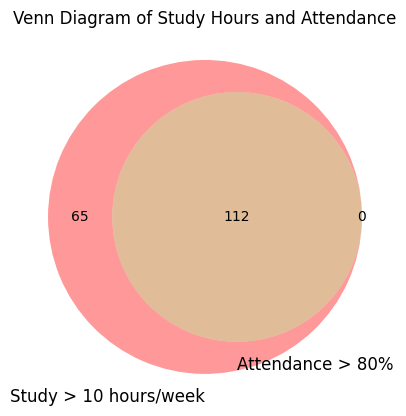

In [16]:
# Create Venn diagram
plt.figure()

venn2(
    subsets=(A_only, B_only, AB),
    set_labels=("Study > 10 hours/week", "Attendance > 80%")
)

plt.title("Venn Diagram of Study Hours and Attendance")
plt.show()

Contingency Table & Probability Calculations

In [17]:
contingency_table = pd.crosstab(
    df["group_discussion"],
    df["final_exam_pass"]
)

contingency_table

final_exam_pass,Fail,Pass
group_discussion,,
No,73,13
Yes,0,114


Joint Probability

In [18]:
joint_prob = contingency_table.loc["Yes", "Pass"] / len(df)
joint_prob

np.float64(0.57)

 Marginal Probability

In [19]:


marginal_prob = pass_counts["Pass"] / len(df)
marginal_prob

np.float64(0.635)

 Conditional Probability

In [20]:
conditional_prob = (
    contingency_table.loc["Yes", "Pass"] /
    contingency_table.loc["Yes"].sum()
)

conditional_prob

np.float64(1.0)

Interpret Conditional Probability

In [21]:
# Probabilities needed for relationship analysis
P_pass = (df["final_exam_pass"] == "Pass").mean()
P_pass_given_group = (
    (df[(df["group_discussion"] == "Yes") & (df["final_exam_pass"] == "Pass")].shape[0]) /
    (df[df["group_discussion"] == "Yes"].shape[0])
)

P_pass, P_pass_given_group

(np.float64(0.635), 1.0)

In [22]:
if conditional_prob != marginal_prob:
    result = "Events are Dependent"
else:
    result = "Events are Independent"

result

'Events are Dependent'

Bayes Theorem

In [23]:
P_H_given_P = 0.70
P_H = 0.60
P_P = marginal_prob

bayes_result = (P_H_given_P * P_P) / P_H
bayes_result

np.float64(0.7408333333333332)